In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
network = "case300"
data_dir = os.path.join(os.getcwd(), "..", "data", network, "raw")
node_file = os.path.join(data_dir, "pf_node.csv")
edge_file = os.path.join(data_dir, "pf_edge.csv")

In [5]:
df = pd.read_csv(node_file)

C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_15412\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_15412\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_15412\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
C:\Users\MatteoMazzonelli\AppData\Local\Temp\ipykernel_15412\3872263316.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

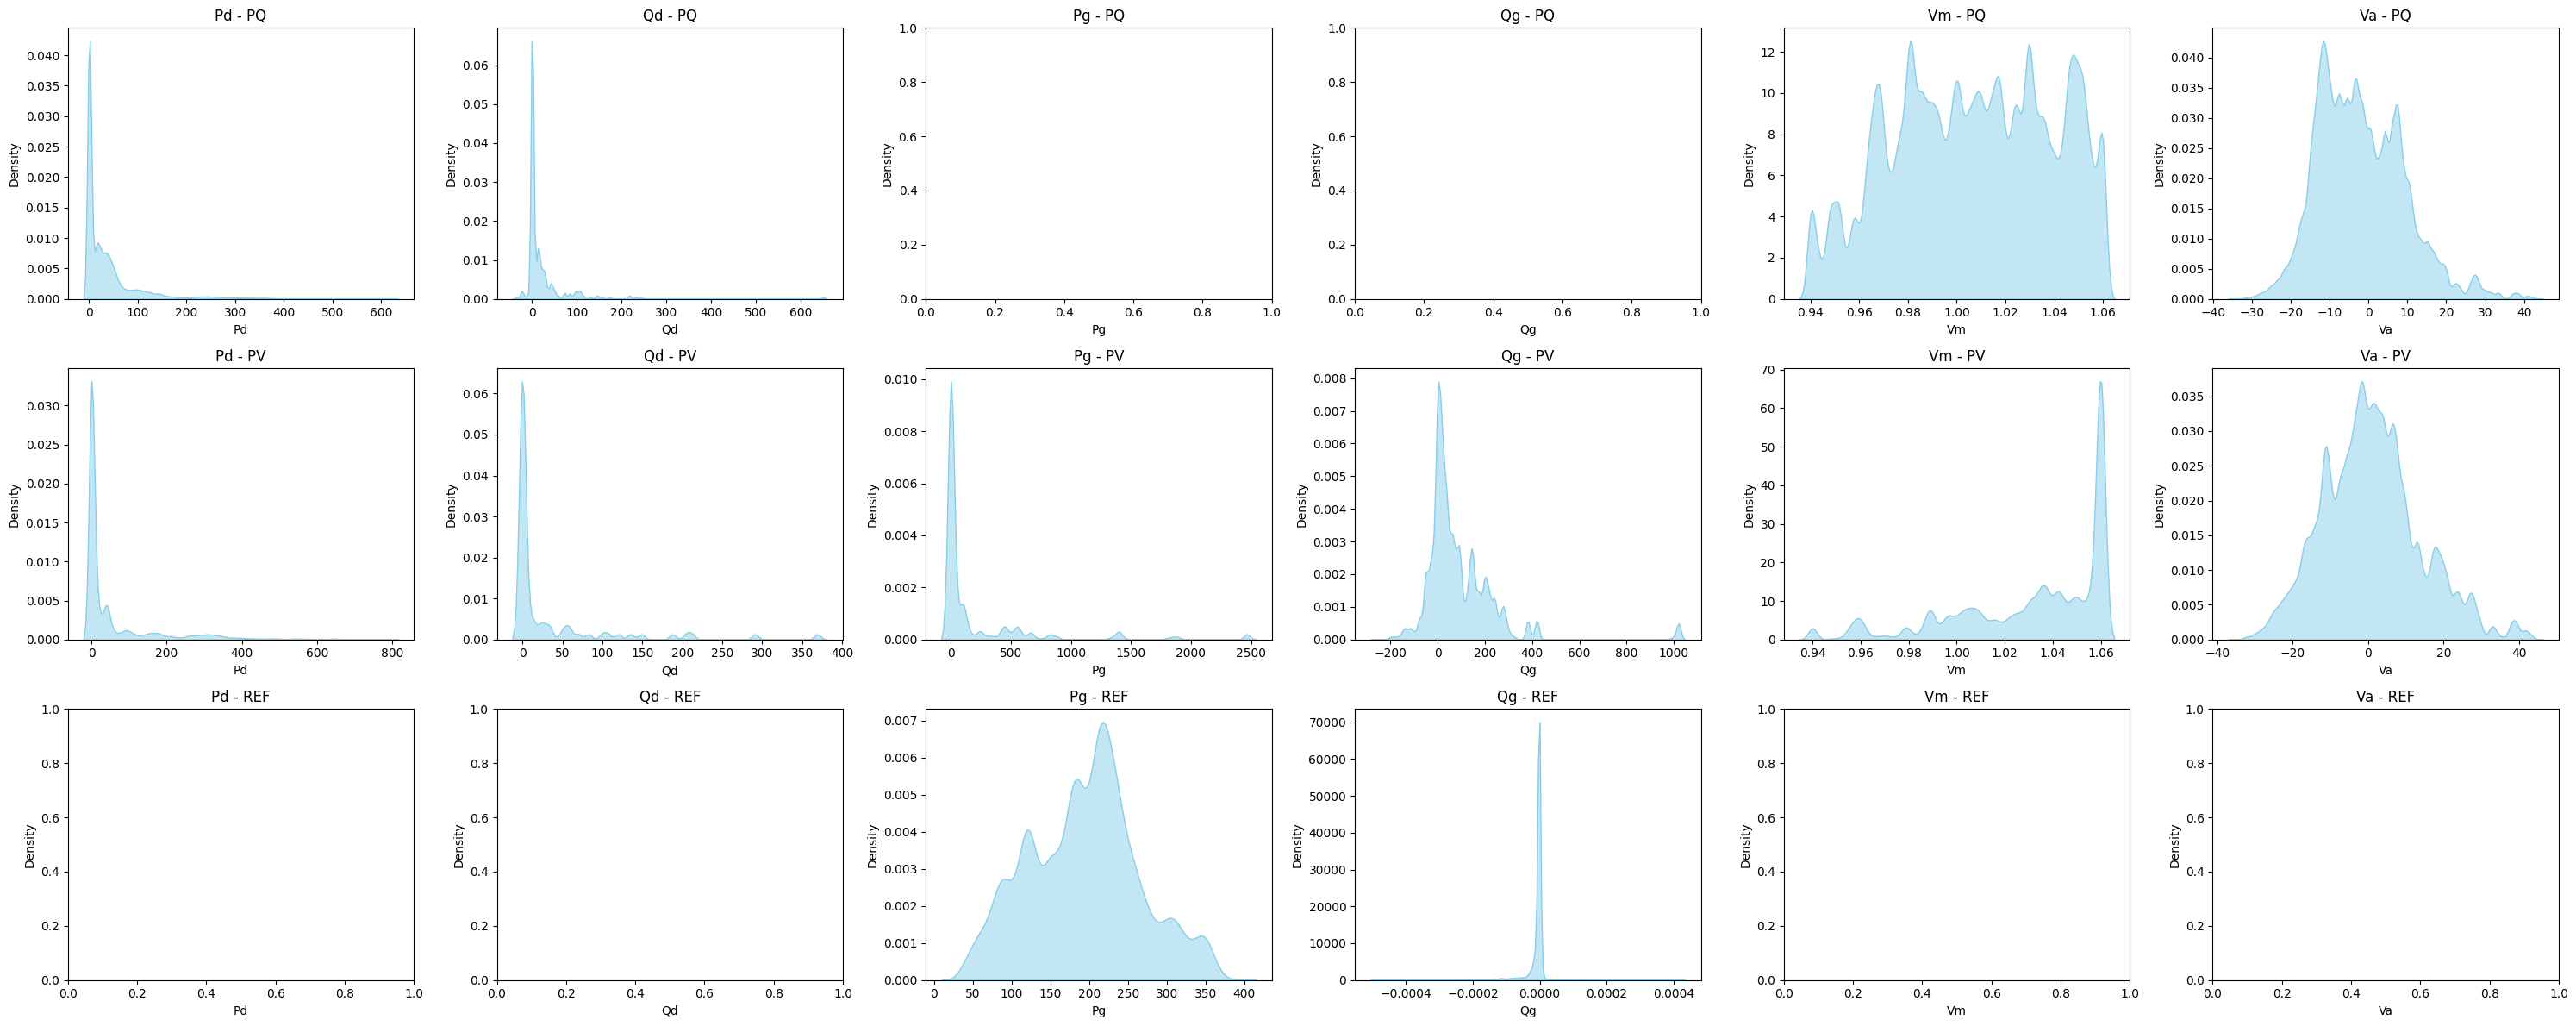

In [ ]:

def get_node_type(row):
    if row['REF'] == 1:
        return 'REF'
    elif row['PV'] == 1:
        return 'PV'
    elif row['PQ'] == 1:
        return 'PQ'
    return 'Unknown'

df['Node Type'] = df.apply(get_node_type, axis=1)

# Features to analyze
features = ['Pd', 'Qd', 'Pg', 'Qg', 'Vm', 'Va']

# Node types to plot
node_types = df['Node Type'].unique()


# Set up the plot grid
num_rows = len(node_types)
num_cols = len(features)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows), sharex=False, sharey=False)

for i, node_type in enumerate(node_types):
    node_data = df[df['Node Type'] == node_type]
    for j, feature in enumerate(features):
        ax = axes[i, j] if num_rows > 1 else axes[j]
        sns.kdeplot(data=node_data, x=feature, fill=True, ax=ax, alpha=0.5, color='skyblue')
        ax.set_title(f'{feature} - {node_type}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

plt.tight_layout()
plt.savefig("plot_features.png")

In [7]:
stats = df.groupby('Node Type')[features].agg(['mean', 'min', 'max'])

# Save the statistics to a CSV file for reference
stats.to_csv("node_type_feature_stats.csv")

In [8]:
stats

Pd                          Qd                       Pg  \
                mean  min         max       mean   min    max        mean   
Node Type                                                                   
PQ         44.714918  0.0  623.964230  23.476233 -34.9  650.0    0.000000   
PV         60.092755  0.0  794.930429  32.531579   0.0  369.0  193.277629   
REF         0.000000  0.0    0.000000   0.000000   0.0    0.0  193.590633   

                                             Qg                           \
                    min          max       mean         min          max   
Node Type                                                                  
PQ         0.000000e+00     0.000000   0.000000    0.000000     0.000000   
PV        -2.310940e-09  2465.000000  85.784066 -257.999980  1021.000115   
REF        3.947333e+01   385.367943  -0.000009   -0.000496     0.000424   

                 Vm                    Va                        
               mean   min   max      mean        min        max  
Node Type                                                        
PQ         1.006555  0.94  1.06 -2.052940 -34.466229  43.311292  
PV         1.031314  0.94  1.06  0.841653 -34.766051  44.043578  
REF        1.000000  1.00  1.00  0.000000   0.000000   0.000000